In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


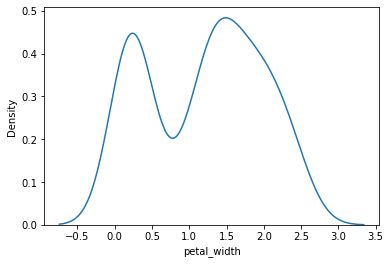

In [5]:
sns.kdeplot(data['petal_width'])
plt.show()

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
sepallength = np.array(data.sepal_length,np.float32)
sepalwidth = np.array(data.sepal_width,np.float32)
petallength = np.array(data.petal_length,np.float32)

In [9]:
petal_width = np.array(data.petal_width,np.float32) #target
features = np.array([sepallength,sepalwidth,petallength]) #features

intercept = tf.Variable(0.1,np.float32)
slope = tf.Variable([0.1,0.1,0.1],np.float32)

In [11]:
features.shape

(3, 150)

In [12]:
def multi_linearRegression(intercept,slope,features):
    return intercept + slope[0]*features[0]+slope[1]*features[1]+slope[2]*features[2]

def loss_function(intercept,slope,targets,features):
    predictions = multi_linearRegression(intercept,slope,features)
    return tf.keras.losses.mse(targets,predictions)

In [13]:
opt = tf.keras.optimizers.Adam()

In [14]:
for j in range(1000):
    opt.minimize(lambda: loss_function(intercept,slope,petal_width,features),
                var_list=[intercept,slope])

In [20]:
print('intercept: ',intercept)

intercept:  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.14283684>


In [ ]:
new_sepallength = np.array(4.5,np.float32)
new_sepalwidth = np.array(3.1,np.float32)
new_petallength = np.array(1.6,np.float32)

new_features


In [22]:
print(multi_linearRegression(intercept,slope,))

TypeError: 'builtin_function_or_method' object is not subscriptable